<a href="https://colab.research.google.com/github/aishanbianshan/energy-info_A2_g6/blob/main/Copy_of_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/aishanbianshan/energy-info_A2_g6/

Cloning into 'energy-info_A2_g6'...
remote: Enumerating objects: 454, done.
remote: Counting objects: 100% (250/250), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 454 (delta 115), reused 161 (delta 66), pack-reused 204
Receiving objects: 100% (454/454), 35.82 MiB | 26.42 MiB/s, done.
Resolving deltas: 100% (164/164), done.


In [ ]:
!git pull
%cd /content/energy-info_A2_g6/data
!pwd
!ls


fatal: not a git repository (or any of the parent directories): .git
/content/energy-info_A2_g6/data
/content/energy-info_A2_g6/data
ForecastTemplate.csv  Solution.csv  TrainData.csv  WeatherForecastInput.csv


In [ ]:
#installs
!pip install keras

In [ ]:
#imports
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import sigmoid
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Read data from CSV
data = pd.read_csv('TrainData.csv')

# # Extract features (X) and target variable (y)
# X = data['POWER'].iloc[:15359].values.reshape(-1, 1)  # Reshape to 2D array for sklearn
# y = data['POWER'].iloc[1:15360].values

# svr = SVR(kernel='rbf')  # RBF kernel is commonly used for SVR
# svr.fit(X, y)

# # Standardize the input for prediction
# scaler = StandardScaler()
# X_pred = scaler.fit_transform(data['POWER'].iloc[15360:].values.reshape(-1, 1))

# # Predict y for the input X
# y_pred = svr.predict(X_pred)

# # Print the predicted values
# # print("Predicted values:", y_pred)

# # learn regression worked!!
# # Create and fit linear regression model
# model = LinearRegression()
# model.fit(X, y)

# # Extract features for prediction (X_pred)
# X_pred_lr = data['POWER'].iloc[15360:].values.reshape(-1, 1)  # Reshape to 2D array for sklearn

# # Predict y for X_pred
# y_pred_lr = model.predict(X_pred_lr)

# # print("Predicted y:", y_pred)
# # print("number of prediction in y:", len(y_pred))

# solution = pd.read_csv("Solution.csv")
# dates = pd.to_datetime(solution["TIMESTAMP"], format="%Y%m%d %H:%M")
# plt.figure(figsize=(12, 8))
# plt.plot(dates, solution['POWER'], label='True Wind Power')
# plt.plot(dates, y_pred_lr, label='LR Predicted Power')
# plt.plot(dates, y_pred, label='SVR Predicted Power')
# plt.title(f"True Wind Power vs LR and SVR Predicted Power")
# plt.xticks(rotation=45)
# plt.xlabel("Time")
# plt.ylabel("Wind Power")
# plt.legend()
# plt.tight_layout()
# plt.show()


# RMSE = np.sqrt(mean_squared_error(solution["POWER"], y_pred))
# RMSE_lr = np.sqrt(mean_squared_error(solution["POWER"], y_pred_lr))
# print("RMSE for svr=",RMSE)
# print("RMSE for lr=",RMSE_lr)

# Load data from Excel file
data = pd.read_csv('TrainData.csv')
forcase = pd.read_csv('WeatherForecastInput.csv')


# Separate input (X) and output (y) columns
data['arctan_10'] = np.arctan(data['V10'] / data['U10'])
print(data[['arctan_10']])
data['arctan_100'] = np.arctan(data['V100'] / data['U100'])
print(data[['arctan_10']])
X = data[['arctan_10', 'WS10','arctan_100','WS100']]
y = data['POWER']

# Define the model
model = Sequential()
model.add(Dense(3, input_dim=4, activation=sigmoid))  # Hidden layer with 3 nodes
model.add(Dense(1, activation=sigmoid))              # Output layer with 1 node

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=100, batch_size=10)  # Adjust epochs and batch_size as needed

# process the weatherforecast data
forcase['arctan_10'] = np.arctan(forcase['V10'] / forcase['U10'])
print(forcase[['arctan_10']])
forcase['arctan_100'] = np.arctan(forcase['V100'] / forcase['U100'])
print(forcase[['arctan_10']])
X_pred = forcase[['arctan_10', 'WS10','arctan_100','WS100']]

y_pred = model.predict (X_pred)

print(y_pred)
print("size of y_pred:", len(y_pred))



       arctan_10
0      -1.425687
1      -1.447818
2       1.538360
3       1.341690
4       1.144675
...          ...
16075   0.883586
16076   1.067764
16077   1.445212
16078  -1.180082
16079  -0.625101

[16080 rows x 1 columns]
       arctan_10
0      -1.425687
1      -1.447818
2       1.538360
3       1.341690
4       1.144675
...          ...
16075   0.883586
16076   1.067764
16077   1.445212
16078  -1.180082
16079  -0.625101

[16080 rows x 1 columns]
Epoch 1/100
1608/1608 [==============================] - 3s 2ms/step - loss: 0.6805 - accuracy: 0.0728
Epoch 2/100
1608/1608 [==============================] - 3s 2ms/step - loss: 0.6372 - accuracy: 0.0784
Epoch 3/100
1608/1608 [==============================] - 3s 2ms/step - loss: 0.5639 - accuracy: 0.0782
Epoch 4/100
1608/1608 [==============================] - 4s 3ms/step - loss: 0.5076 - accuracy: 0.0780
Epoch 5/100
1608/1608 [==============================] - 3s 2ms/step - loss: 0.4944 - accuracy: 0.0780
Epoch 6/100
1608/1608 [==

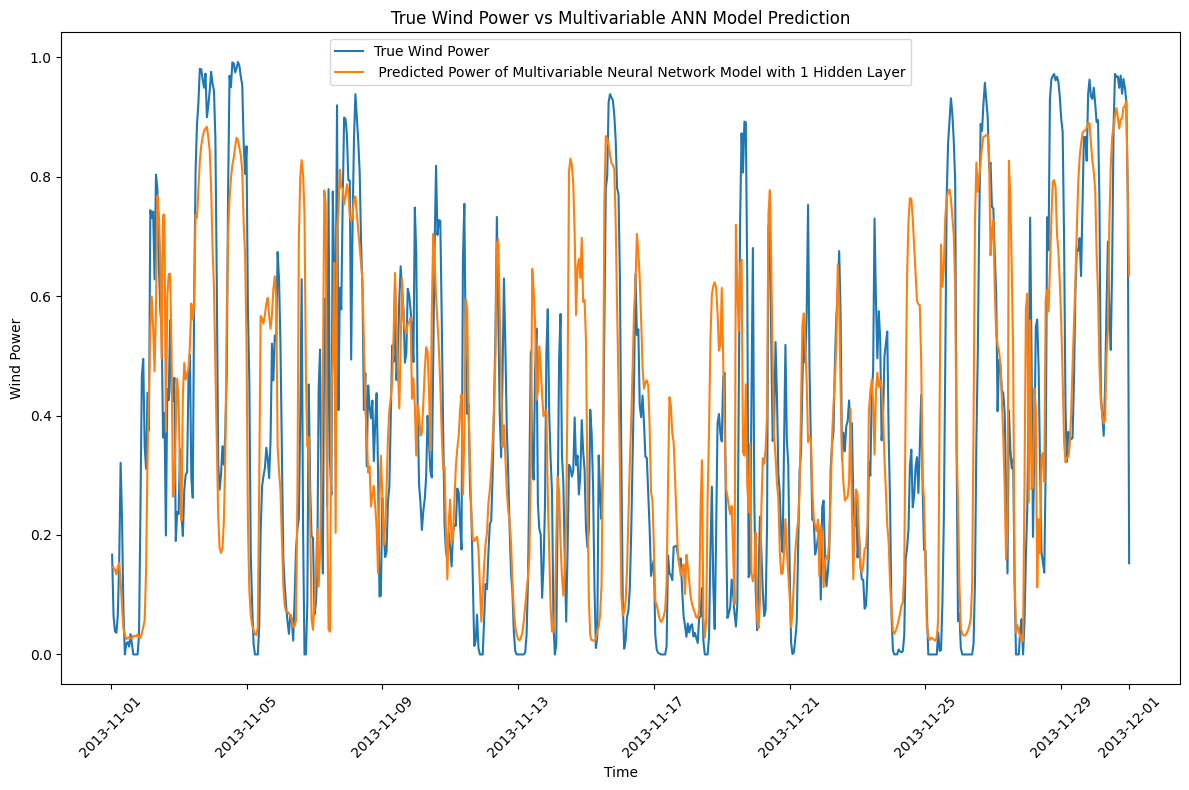

In [ ]:

solution = pd.read_csv("Solution.csv")
dates = pd.to_datetime(solution["TIMESTAMP"], format="%Y%m%d %H:%M")
plt.figure(figsize=(12, 8))
plt.plot(dates, solution['POWER'], label='True Wind Power')
plt.plot(dates, y_pred, label=' Predicted Power of Multivariable Neural Network Model with 1 Hidden Layer')
# plt.plot(dates, y_pred, label='SVR Predicted Power')
plt.title(f"True Wind Power vs Multivariable ANN Model Prediction")
plt.xticks(rotation=45)
plt.xlabel("Time")
plt.ylabel("Wind Power")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
RMSE = np.sqrt(mean_squared_error(solution["POWER"], y_pred))
# RMSE_lr = np.sqrt(mean_squared_error(solution["POWER"], y_pred_lr))
print("RMSE for Multivariable ANN =",RMSE)
# print("RMSE for lr=",RMSE_lr)

RMSE for Multivariable ANN = 0.1928214148771009
